In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np

In [2]:
DATASET_PATH = '../Data/Employee_data.csv'
df = pd.read_csv(DATASET_PATH)
df.head()
#Getting first 5 rows of the dataset

Employee_ID        Department  Gender  Age   Job_Title  \
0            1                IT    Male   55  Specialist   
1            2           Finance    Male   29   Developer   
2            3           Finance    Male   55  Specialist   
3            4  Customer Support  Female   48     Analyst   
4            5       Engineering  Female   36     Analyst   

                    Hire_Date  Years_At_Company Education_Level  \
0  2022-01-19 08:03:05.556036                 2     High School   
1  2024-04-18 08:03:05.556036                 0     High School   
2  2015-10-26 08:03:05.556036                 8     High School   
3  2016-10-22 08:03:05.556036                 7        Bachelor   
4  2021-07-23 08:03:05.556036                 3        Bachelor   

   Performance_Score  Monthly_Salary  Work_Hours_Per_Week  Projects_Handled  \
0                  5          6750.0                   33                32   
1                  5          7500.0                   34                34   
2                  3          5850.0                   37                27   
3                  2          4800.0                   52                10   
4                  2          4800.0                   38                11   

   Overtime_Hours  Sick_Days  Remote_Work_Frequency  Team_Size  \
0              22          2                      0         14   
1              13         14                    100         12   
2               6          3                     50         10   
3              28         12                    100         10   
4              29         13                    100         15   

   Training_Hours  Promotions  Employee_Satisfaction_Score  Resigned  
0              66           0                         2.63     False  
1              61           2                         1.72     False  
2               1           0                         3.17     False  
3               0           1                         1.86     False  
4               9           1                         1.25     False

In [3]:
#Checking the shape of the Dataset
df.shape

print(f"Dataset has {df.shape[0]} rows and {df.shape[1]} columns")

Dataset has 100000 rows and 20 columns


In [4]:
#Looking at Datatype of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 20 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Employee_ID                  100000 non-null  int64  
 1   Department                   100000 non-null  object 
 2   Gender                       100000 non-null  object 
 3   Age                          100000 non-null  int64  
 4   Job_Title                    100000 non-null  object 
 5   Hire_Date                    100000 non-null  object 
 6   Years_At_Company             100000 non-null  int64  
 7   Education_Level              100000 non-null  object 
 8   Performance_Score            100000 non-null  int64  
 9   Monthly_Salary               100000 non-null  float64
 10  Work_Hours_Per_Week          100000 non-null  int64  
 11  Projects_Handled             100000 non-null  int64  
 12  Overtime_Hours               100000 non-null  int64  
 13  

In [5]:
df['Hire_Date'] = pd.to_datetime(df['Hire_Date'],dayfirst=True,format='ISO8601')

In [6]:
#TargetColumn
df['Employee_Satisfaction_Score']

0        2.63
1        1.72
2        3.17
3        1.86
4        1.25
         ... 
99995    1.28
99996    3.48
99997    2.60
99998    3.10
99999    2.64
Name: Employee_Satisfaction_Score, Length: 100000, dtype: float64

In [ ]:
#Dropping Resigned column , we don'nt 
# df.drop(columns=['Resigned'])

In [7]:

categorical_cols = df.select_dtypes(include='object').columns
categorical_cols

Index(['Department', 'Gender', 'Job_Title', 'Education_Level'], dtype='object')

In [8]:
#Getting unique values of each categorical columns

for col in categorical_cols:
    values = df[col].unique()
    print(f"--{col}-- values: {len(values)}\n")
    print(values)
    print(df[col].value_counts())
    print()
    

--Department-- values: 9

['IT' 'Finance' 'Customer Support' 'Engineering' 'Marketing' 'HR'
 'Operations' 'Sales' 'Legal']
Department
Marketing           11216
Finance             11200
Operations          11181
IT                  11131
Sales               11122
Legal               11118
Customer Support    11116
HR                  10960
Engineering         10956
Name: count, dtype: int64

--Gender-- values: 3

['Male' 'Female' 'Other']
Gender
Male      48031
Female    48001
Other      3968
Name: count, dtype: int64

--Job_Title-- values: 7

['Specialist' 'Developer' 'Analyst' 'Manager' 'Technician' 'Engineer'
 'Consultant']
Job_Title
Specialist    14507
Manager       14325
Technician    14285
Analyst       14261
Engineer      14217
Consultant    14210
Developer     14195
Name: count, dtype: int64

--Education_Level-- values: 4

['High School' 'Bachelor' 'Master' 'PhD']
Education_Level
Bachelor       50041
High School    30004
Master         14904
PhD             5051
Name: count, dt

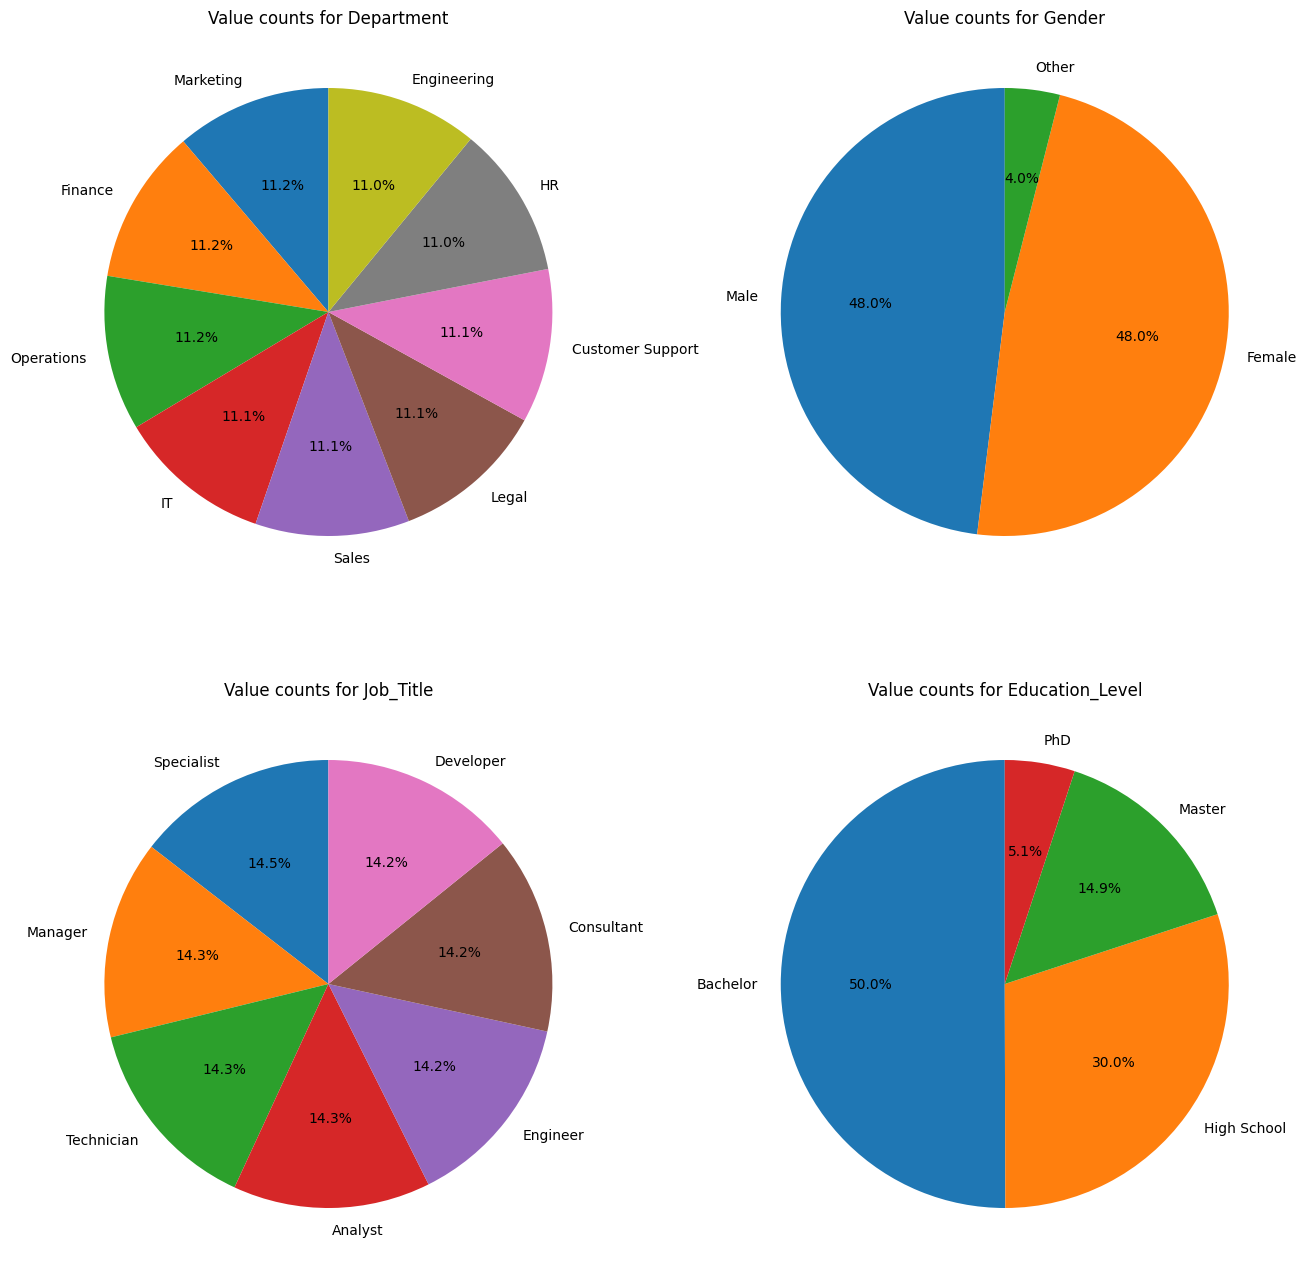

In [9]:
fig, axes = plt.subplots(2, 2,figsize=(16,16))
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    value_counts = df[col].value_counts()
    axes[i].pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=90)
    axes[i].set_title(f'Value counts for {col}')


In [77]:
df.columns

Index(['Employee_ID', 'Department', 'Gender', 'Age', 'Job_Title', 'Hire_Date',
       'Years_At_Company', 'Education_Level', 'Performance_Score',
       'Monthly_Salary', 'Work_Hours_Per_Week', 'Projects_Handled',
       'Overtime_Hours', 'Sick_Days', 'Remote_Work_Frequency', 'Team_Size',
       'Training_Hours', 'Promotions', 'Employee_Satisfaction_Score',
       'Resigned'],
      dtype='object')

In [11]:
df.describe()

Employee_ID            Age                      Hire_Date  \
count  100000.000000  100000.000000                         100000   
mean    50000.500000      41.029410  2019-09-15 06:20:20.916036096   
min         1.000000      22.000000     2014-09-07 08:03:05.556036   
25%     25000.750000      31.000000  2017-03-20 08:03:05.556036096   
50%     50000.500000      41.000000  2019-09-21 08:03:05.556036096   
75%     75000.250000      51.000000  2022-03-14 08:03:05.556036096   
max    100000.000000      60.000000     2024-09-03 08:03:05.556036   
std     28867.657797      11.244121                            NaN   

       Years_At_Company  Performance_Score  Monthly_Salary  \
count     100000.000000      100000.000000   100000.000000   
mean           4.476070           2.995430     6403.211000   
min            0.000000           1.000000     3850.000000   
25%            2.000000           2.000000     5250.000000   
50%            4.000000           3.000000     6500.000000   
75%            7.000000           4.000000     7500.000000   
max           10.000000           5.000000     9000.000000   
std            2.869336           1.414726     1372.508717   

       Work_Hours_Per_Week  Projects_Handled  Overtime_Hours      Sick_Days  \
count        100000.000000     100000.000000   100000.000000  100000.000000   
mean             44.956950         24.431170       14.514930       7.008550   
min              30.000000          0.000000        0.000000       0.000000   
25%              37.000000         12.000000        7.000000       3.000000   
50%              45.000000         24.000000       15.000000       7.000000   
75%              53.000000         37.000000       22.000000      11.000000   
max              60.000000         49.000000       29.000000      14.000000   
std               8.942003         14.469584        8.664026       4.331591   

       Remote_Work_Frequency      Team_Size  Training_Hours     Promotions  \
count          100000.000000  100000.000000   100000.000000  100000.000000   
mean               50.090500      10.013560       49.506060       0.999720   
min                 0.000000       1.000000        0.000000       0.000000   
25%                25.000000       5.000000       25.000000       0.000000   
50%                50.000000      10.000000       49.000000       1.000000   
75%                75.000000      15.000000       75.000000       2.000000   
max               100.000000      19.000000       99.000000       2.000000   
std                35.351157       5.495405       28.890383       0.815872   

       Employee_Satisfaction_Score  
count                100000.000000  
mean                      2.999088  
min                       1.000000  
25%                       2.010000  
50%                       3.000000  
75%                       3.990000  
max                       5.000000  
std                       1.150719

In [17]:
num_cols = df.drop(columns=['Employee_ID']).select_dtypes(include='number').columns
num_cols

Index(['Age', 'Years_At_Company', 'Performance_Score', 'Monthly_Salary',
       'Work_Hours_Per_Week', 'Projects_Handled', 'Overtime_Hours',
       'Sick_Days', 'Remote_Work_Frequency', 'Team_Size', 'Training_Hours',
       'Promotions', 'Employee_Satisfaction_Score'],
      dtype='object')

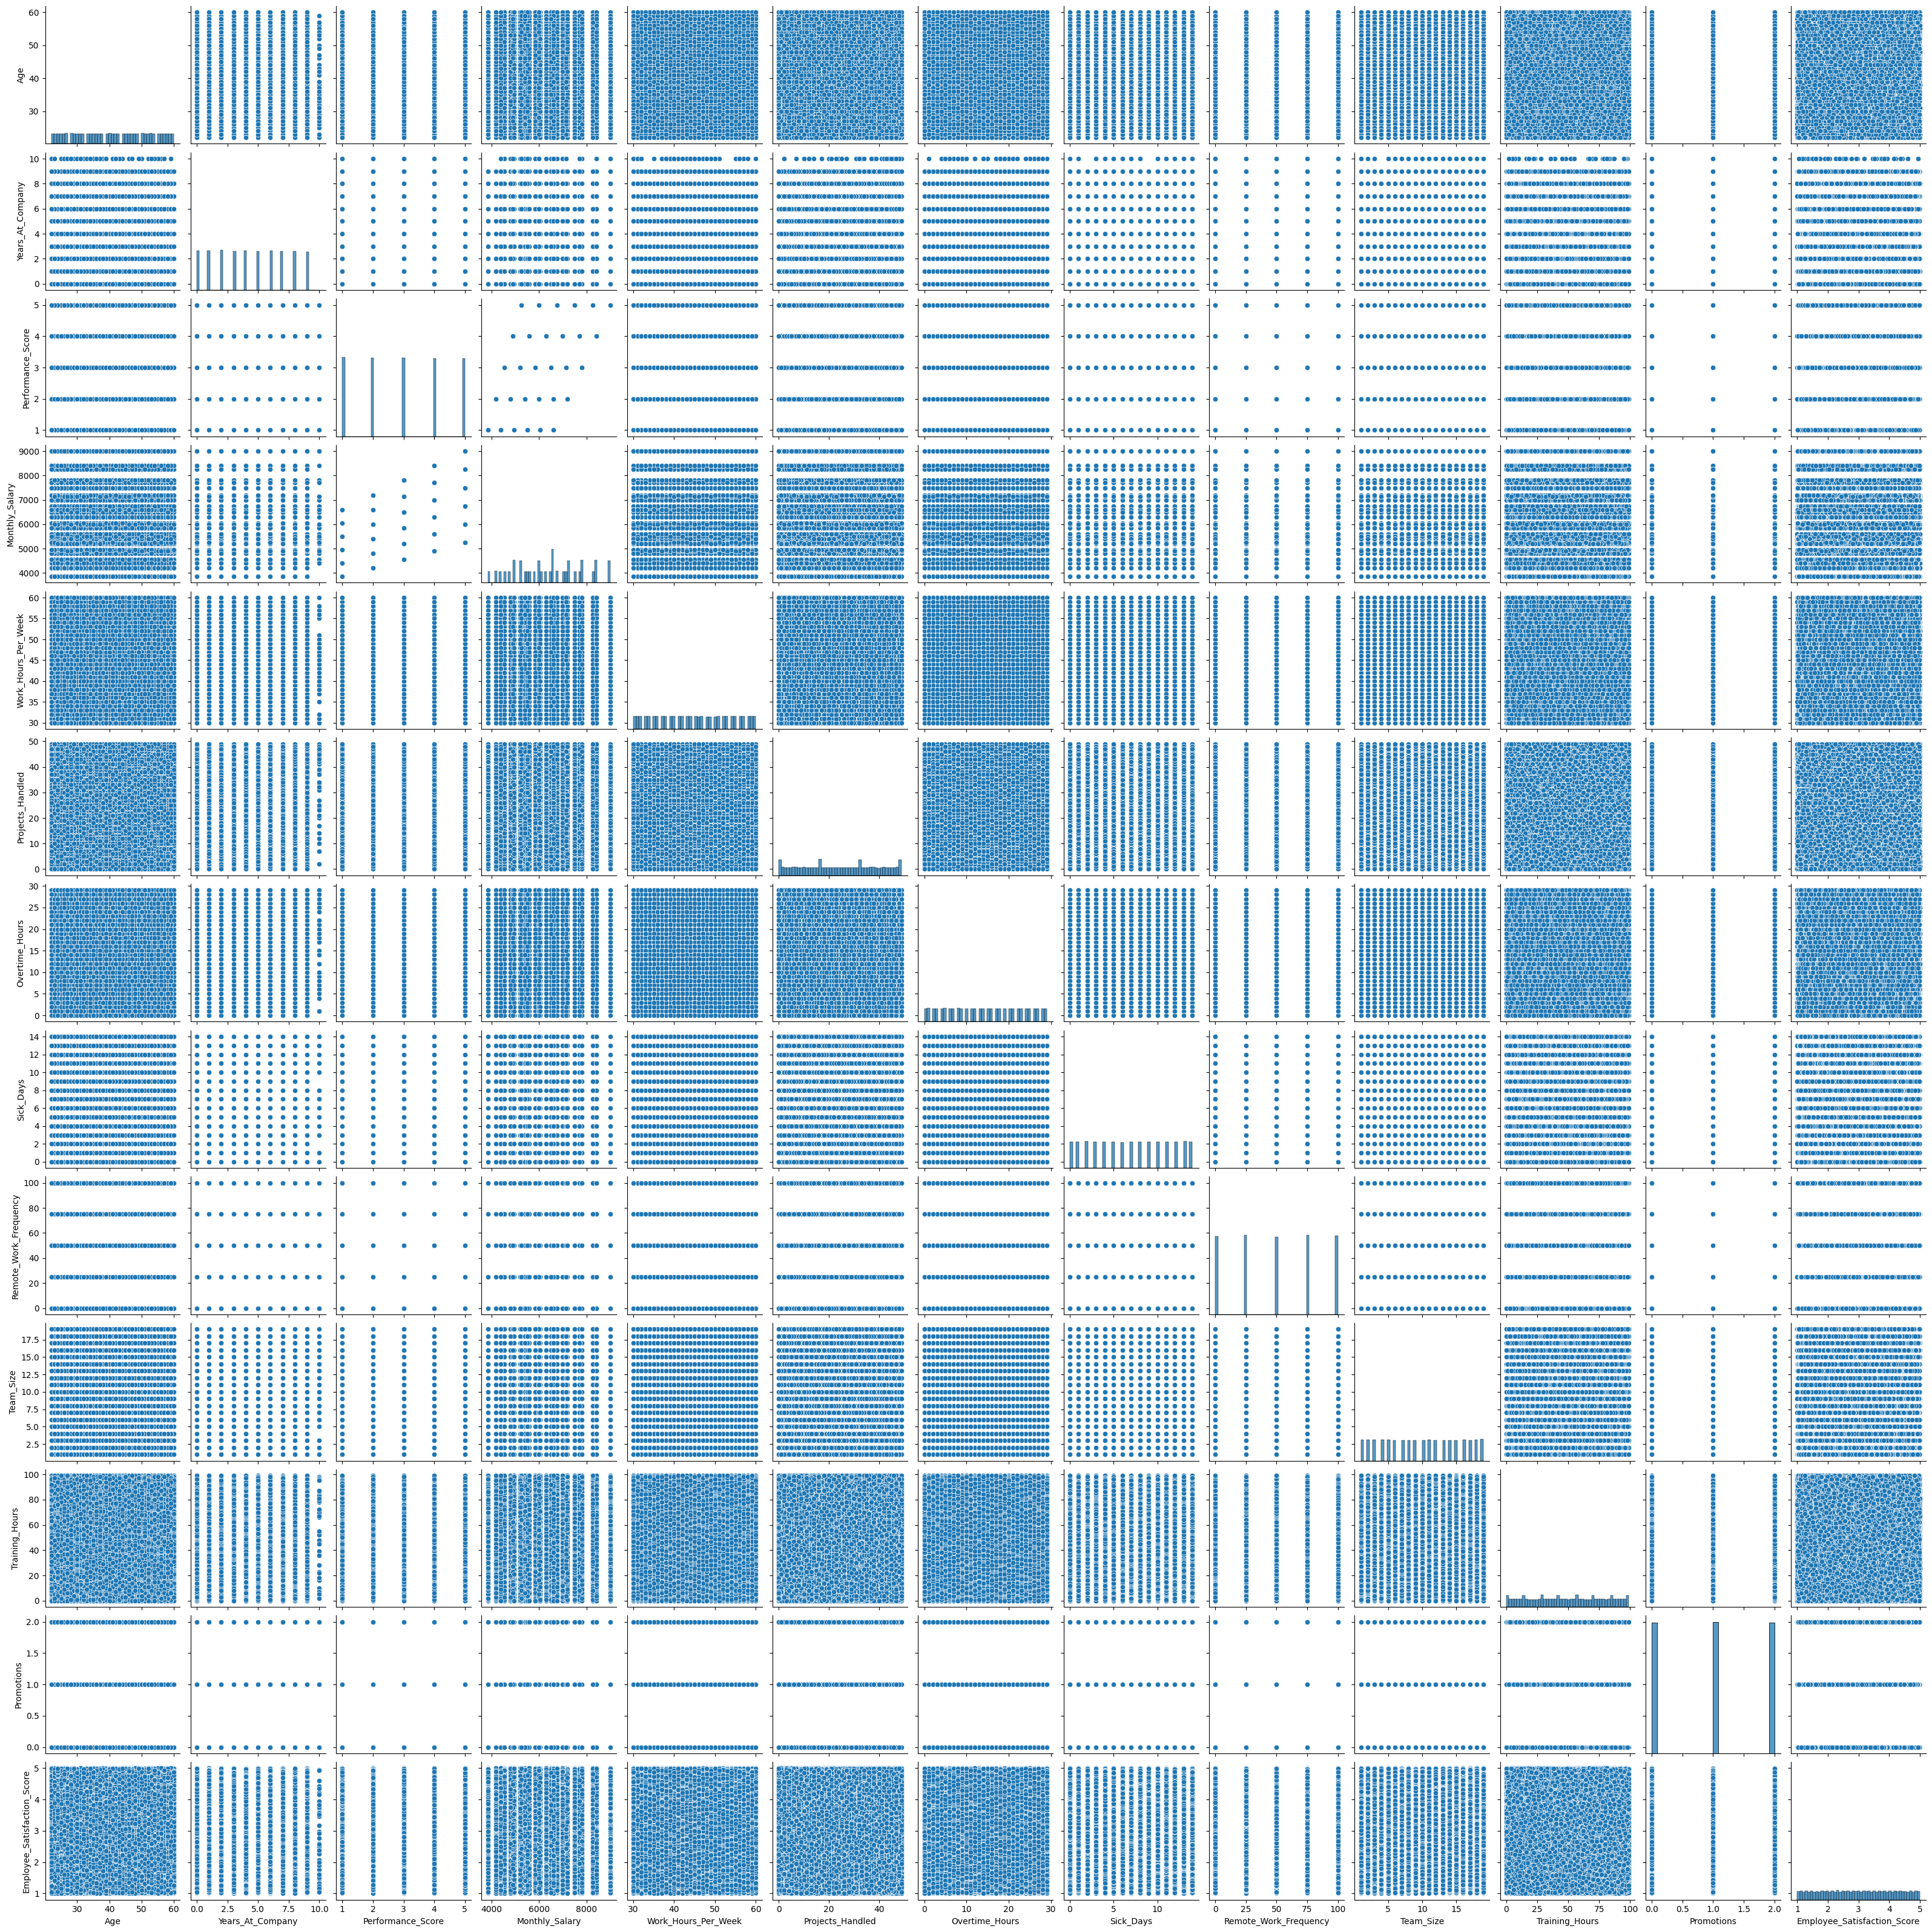

In [18]:
sns.pairplot(df[num_cols])

<Axes: >

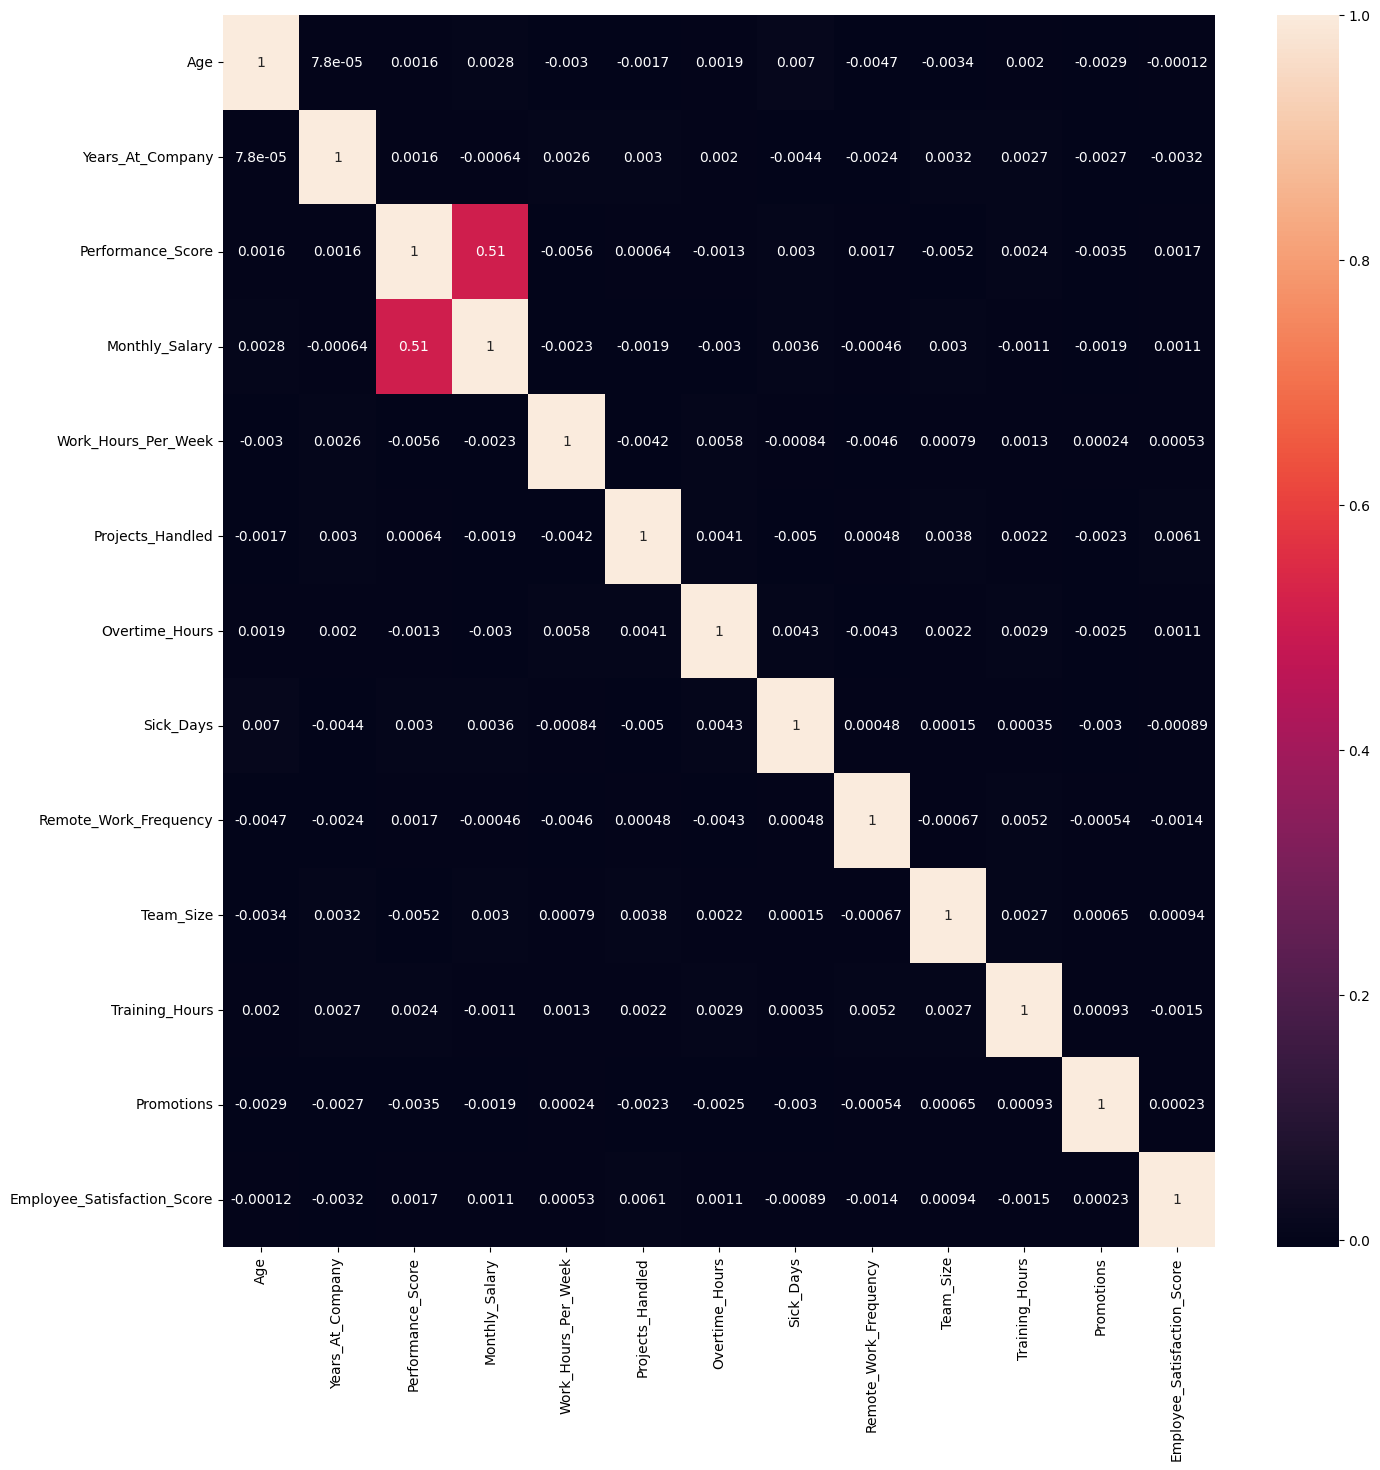

In [23]:
fig, ax = plt.subplots(figsize=(16,16))
sns.heatmap(df[num_cols].corr(),annot=True,ax=ax)

(array([143., 225., 238., 260.,   0., 256., 273., 257., 240.,   0., 235.,
        231., 242., 246.,   0., 242., 267., 237., 262.,   0., 273., 230.,
        265., 246.,   0., 245., 236., 237., 235.,   0., 258., 286., 243.,
        259.,   0., 263., 255., 224., 260.,   0., 225., 242., 256., 238.,
          0., 248., 262., 240., 213.,   0., 267., 204., 263., 249.,   0.,
        230., 236., 281., 257.,   0., 239., 246., 248., 238.,   0., 226.,
        259., 231., 261.,   0., 252., 239., 268., 249.,   0., 259., 253.,
        218., 239., 220.,   0., 233., 261., 245., 240.,   0., 251., 273.,
        242.,   0., 253., 237., 272., 240.,   0., 223., 251., 234., 273.,
          0., 269., 269., 240., 233.,   0., 222., 241., 258., 255.,   0.,
        262., 231., 253., 259.,   0., 257., 264., 221., 281.,   0., 257.,
        255., 250., 223.,   0., 239., 255., 248., 265.,   0., 263., 259.,
        255., 233.,   0., 253., 240., 228., 227.,   0., 255., 291., 269.,
        256.,   0., 238., 226., 283., 

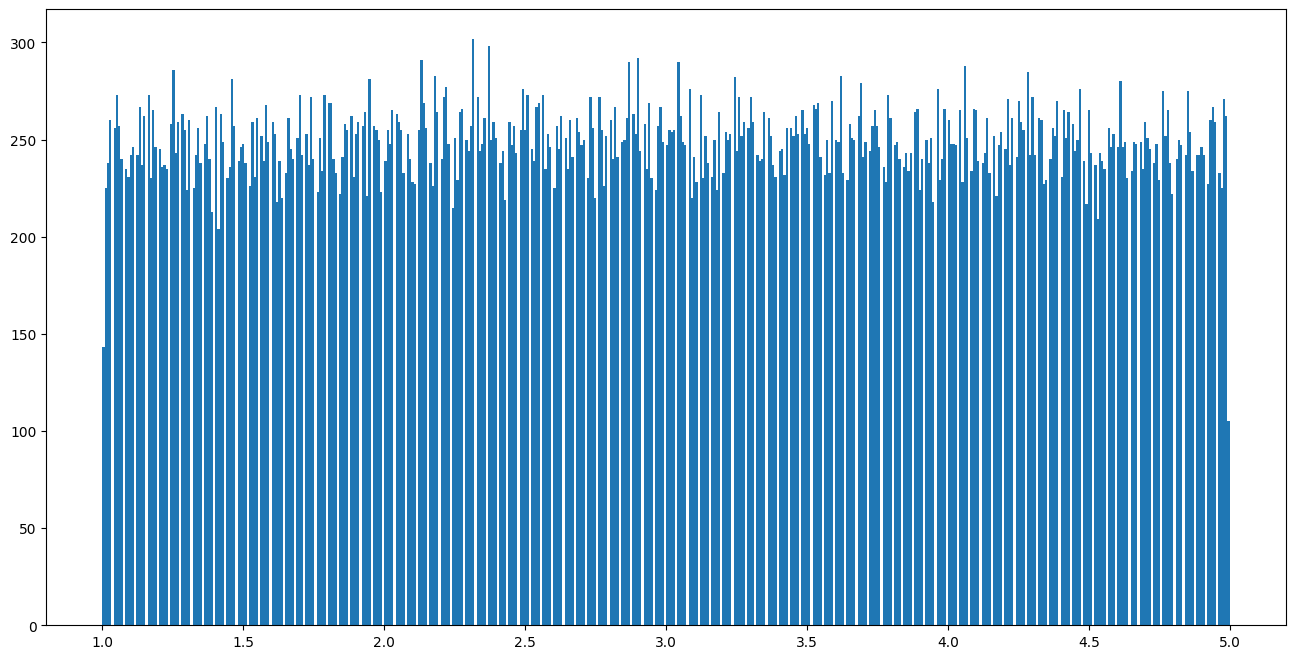

In [32]:
#Most of the features are not highly correlated
fig, ax = plt.subplots(figsize=(16,8))
plt.hist(df['Employee_Satisfaction_Score'],bins=500)

In [33]:
num_cols

Index(['Age', 'Years_At_Company', 'Performance_Score', 'Monthly_Salary',
       'Work_Hours_Per_Week', 'Projects_Handled', 'Overtime_Hours',
       'Sick_Days', 'Remote_Work_Frequency', 'Team_Size', 'Training_Hours',
       'Promotions', 'Employee_Satisfaction_Score'],
      dtype='object')

In [37]:
df.isna().sum()
#No Null values

Employee_ID                    0
Department                     0
Gender                         0
Age                            0
Job_Title                      0
Hire_Date                      0
Years_At_Company               0
Education_Level                0
Performance_Score              0
Monthly_Salary                 0
Work_Hours_Per_Week            0
Projects_Handled               0
Overtime_Hours                 0
Sick_Days                      0
Remote_Work_Frequency          0
Team_Size                      0
Training_Hours                 0
Promotions                     0
Employee_Satisfaction_Score    0
Resigned                       0
dtype: int64

In [36]:
df[df.duplicated()]
#No duplicates

Empty DataFrame
Columns: [Employee_ID, Department, Gender, Age, Job_Title, Hire_Date, Years_At_Company, Education_Level, Performance_Score, Monthly_Salary, Work_Hours_Per_Week, Projects_Handled, Overtime_Hours, Sick_Days, Remote_Work_Frequency, Team_Size, Training_Hours, Promotions, Employee_Satisfaction_Score, Resigned]
Index: []

In [38]:
df.head()

Employee_ID        Department  Gender  Age   Job_Title  \
0            1                IT    Male   55  Specialist   
1            2           Finance    Male   29   Developer   
2            3           Finance    Male   55  Specialist   
3            4  Customer Support  Female   48     Analyst   
4            5       Engineering  Female   36     Analyst   

                   Hire_Date  Years_At_Company Education_Level  \
0 2022-01-19 08:03:05.556036                 2     High School   
1 2024-04-18 08:03:05.556036                 0     High School   
2 2015-10-26 08:03:05.556036                 8     High School   
3 2016-10-22 08:03:05.556036                 7        Bachelor   
4 2021-07-23 08:03:05.556036                 3        Bachelor   

   Performance_Score  Monthly_Salary  Work_Hours_Per_Week  Projects_Handled  \
0                  5          6750.0                   33                32   
1                  5          7500.0                   34                34   
2                  3          5850.0                   37                27   
3                  2          4800.0                   52                10   
4                  2          4800.0                   38                11   

   Overtime_Hours  Sick_Days  Remote_Work_Frequency  Team_Size  \
0              22          2                      0         14   
1              13         14                    100         12   
2               6          3                     50         10   
3              28         12                    100         10   
4              29         13                    100         15   

   Training_Hours  Promotions  Employee_Satisfaction_Score  Resigned  
0              66           0                         2.63     False  
1              61           2                         1.72     False  
2               1           0                         3.17     False  
3               0           1                         1.86     False  
4               9           1                         1.25     False

<Axes: title={'center': 'Mean Salary of each job role'}, xlabel='Job_Title'>

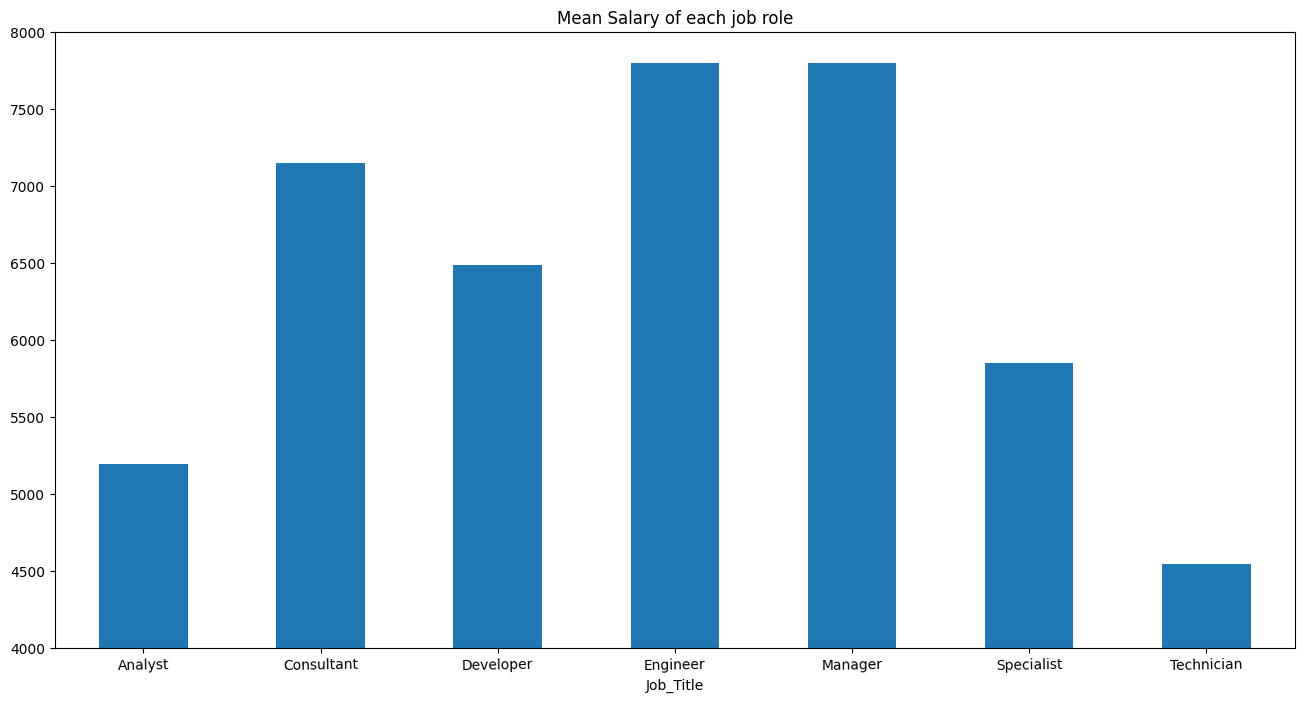

In [54]:
fig, ax = plt.subplots(figsize=(16,8))
df.groupby(by='Job_Title')['Monthly_Salary'].mean().plot(kind='bar',rot=True,
                                                        title='Mean Salary of each job role',
                                                        ylim=(4000,8000),)


<Axes: title={'center': 'Mean Salary of each job role'}, xlabel='Education_Level'>

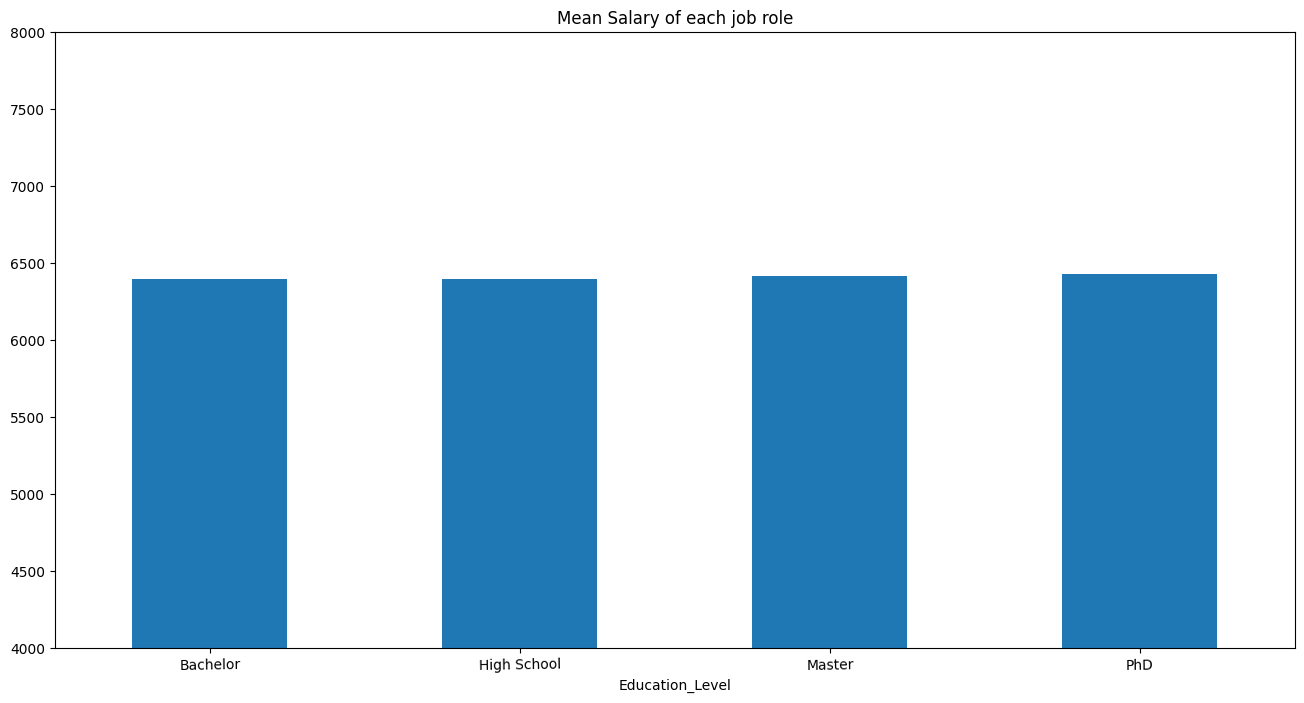

In [61]:
fig, ax = plt.subplots(figsize=(16,8))
df.groupby(by='Education_Level')['Monthly_Salary'].mean().plot(kind='bar',rot=True,
                                                        title='Mean Salary of each job role',
                                                        ylim=(4000,8000),)
